In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import PIL.Image as Image
import PIL.Image
import os
from PIL import *

In [9]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

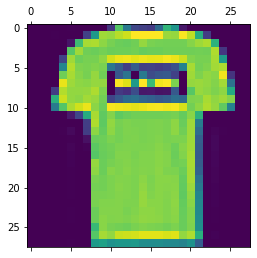

In [12]:
plt.matshow(X_train[1])

In [13]:
'''0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot'''

'0: T-shirt/top\n1: Trouser\n2: Pullover\n3: Dress\n4: Coat\n5: Sandal\n6: Shirt\n7: Sneaker\n8: Bag\n9: Ankle boot'

In [14]:
classes = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [15]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [17]:
y_train = y_train.reshape(-1,)

In [18]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

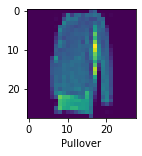

In [19]:
def show(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
show(X_test, y_test, 66)

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 6ms/step - loss: 0.5938 - accuracy: 0.8367
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3091 - accuracy: 0.8883
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2720 - accuracy: 0.9008
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2490 - accuracy: 0.9079
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2292 - accuracy: 0.9147
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2125 - accuracy: 0.9207
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1952 - accuracy: 0.9259
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1846 - accuracy: 0.9302
Epoch 9/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1721 - accuracy: 0.9360
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - l

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4411 - accuracy: 0.8934


[0.4410882890224457, 0.8934000134468079]

In [ ]:
y_predicted = cnn.predict(X_test)
y_predicted[:10]

In [36]:
y_classes = [np.argmax(element) for element in y_predicted]
y_classes[:10]

[9, 2, 1, 1, 6, 1, 2, 2, 5, 5]

In [38]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

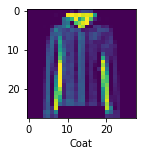

In [42]:
def show(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
show(X_test, y_test, 6)

In [6]:
kite = Image.open("shirt.jpg").resize(28*28)
kite

FileNotFoundError: [Errno 2] No such file or directory: 'shirt.jpg'